In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD



In [69]:
df = pd.read_csv('idmanual.csv')
df = df.dropna()
df.head()

,Term ID,Class,Description,Status,Effective Date,Type,Notes,TM5,NCL Version
1,025-1226,25,Espadrilles,A,4/2/1991,GOODS,05-14-2015: An espadrille is a sandal usually ...,T,"""07-1997"""
5,025-655,25,Cravates,A,7/20/2004,GOODS,05-14-2015: A cravate is a scarf of silk or fi...,T,"""08-2002"""
6,025-407,25,Jerkins,A,1/2/1997,GOODS,05-14-2015: A jerkin is a close fitting hip-le...,T,"""07-1997"""
7,025-781,25,Maillots,A,4/2/1991,GOODS,05-14-2015: Maillots are women's one-piece swi...,T,"""07-1997"""
8,025-562,25,Mules,A,7/20/2004,GOODS,05-14-2015: A mule is a shoe or slipper withou...,T,"""08-2002"""


In [70]:
df.shape

(3222, 9)

In [71]:
products = pd.DataFrame(df.groupby('Description')['Class'].count())
most_popular = products.sort_values('Class', ascending=False)
most_popular.head(10)

,Class
Description,
Chemical additives for use with internal combustion engine fuels,2
Portable tea caddies,1
Pork tripe,1
Portable air conditioners,1
Portable bassinets,1
Portable cradles,1
Portable digital luggage scales,1
Portable folding stadium seats,1
Portable hand-held urinals,1


<Axes: xlabel='Description'>

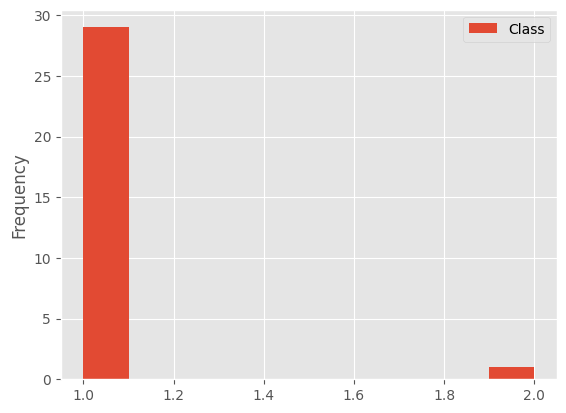

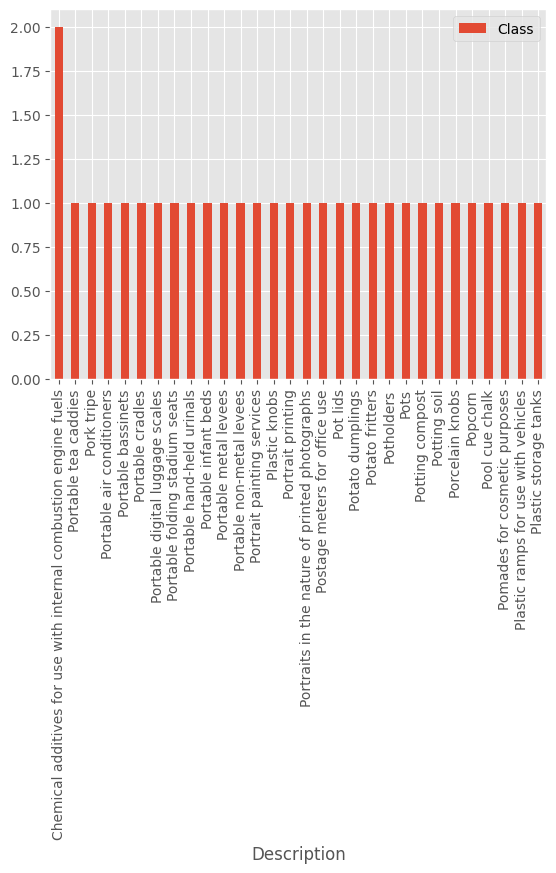

In [72]:
most_popular.head(30).plot(kind = "hist")
most_popular.head(30).plot(kind = "bar")

In [73]:
df1 = df.head(10000)

In [74]:
ratings_utility_matrix = df1.pivot_table(values='Class', index='NCL Version', columns='Description', fill_value=0)
ratings_utility_matrix.head()

Description,3D bioprinters,3D printers,3D printing pens,"Abalones, not live",Abdominal belts,Abdominal hernia belts,Abrasive cloth,Abrasive paper,Absorbable sutures,Acaricides,...,Wrist flashlights,Writing or drawing books,Yacht chartering services,Yacon syrup,Yakitori,Yarn drawing frames,Yellowwood for use as a colorant,Yuca chips,Zirconium,Zoological garden services
NCL Version,,,,,,,,,,,,,,,,,,,,,
"""07-1997""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""08-2002""",0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""09-2007""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""10-2012""",0,0,0,0,0,0,0,0,0,0,...,0,0,39,0,0,0,0,0,0,41
"""10-2013""",0,0,0,29,0,10,0,0,0,5,...,0,0,0,0,0,0,0,0,6,0


In [75]:
ratings_utility_matrix.shape

(15, 3221)

In [76]:
X = ratings_utility_matrix.T
X.head()

NCL Version,"""07-1997""","""08-2002""","""09-2007""","""10-2012""","""10-2013""","""10-2014""","""10-2015""","""10-2016""","""11-2017""","""11-2018""","""11-2019""","""11-2020""","""11-2021""","""11-2022""","""12-2023"""
Description,,,,,,,,,,,,,,,
3D bioprinters,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0
3D printers,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0
3D printing pens,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0
"Abalones, not live",0,0,0,0,29,0,0,0,0,0,0,0,0,0,0
Abdominal belts,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0


In [77]:
X.shape

(3221, 15)

In [78]:
X1 = X

In [79]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(3221, 10)

In [80]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(3221, 3221)

In [81]:
X.index[99]

'Anti-aging creams'

In [82]:
i = "Anti-aging creams"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [83]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(3221,)

In [84]:
Recommend = list(X.index[correlation_product_ID > 0.90])

Recommend.remove(i)

Recommend[0:9]

['Accounting for third parties',
 'Adhesive bands for medical purposes',
 'Advertisement hoarding rental',
 'Aerial conveyors',
 'After shave lotions',
 'Aftershave',
 'Aftershave moisturising cream',
 'Aftershave preparations',
 'Airport baggage check-in services [not including security inspection]']

In [85]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


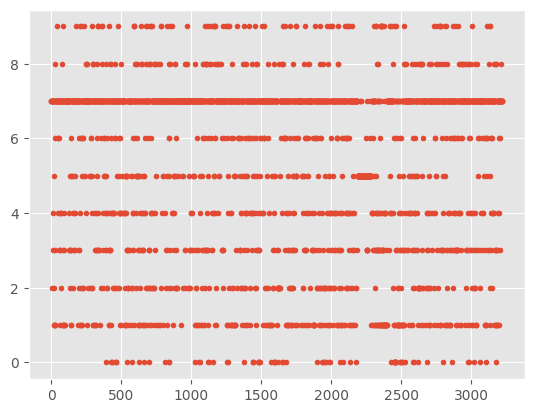

In [86]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()